### Step 1 Import dependencies

In [1]:
import pandas as pd                                    # for reading csv file
import matplotlib.pyplot as plt                        # for data visualization
import seaborn as sns                                  # for data visualization
import numpy as np                                     # for linear algebra
from sklearn.preprocessing import StandardScaler       # for machine learning
from scipy.stats import skew 
# from utility import check_missing_value

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
def create_piechart(data, column):
    """
    objective: Create piechart for categorical varaibles present in pandas Dataframe
    
    parameter:
        data: this is pandas dataframe
        colimn: thie is column name which is used to create plot
        
    return:
        this will show piechart
    """
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
    
    plt.pie(sizes,
           labels=labels,
           autopct='%1.2f%%',
           shadow=False,
           startangle=45)
    
    plt.axis('equal')
    plt.title("Piechart - {}".format(column))
    plt.show()
    
    

    
    # check missing data 
    
def check_missing_value(data):
    """
    Objective: Check missing value count and percentage in all columns
    
    data: input data frame
    return: Missing value data frame 
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent= (data.isnull().sum()/data.isnull().count() *100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [3]:
test_df = pd.read_excel("Data/Titanic_Survival_test.xls", index_col=0)
test_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


In [4]:
train_df = pd.read_excel("Data/Titanic_Survival_Train.xls", index_col=0)


In [5]:
print(train_df.shape)
print(test_df.shape)

(891, 11)
(21, 11)


In [6]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Step 2 EDA

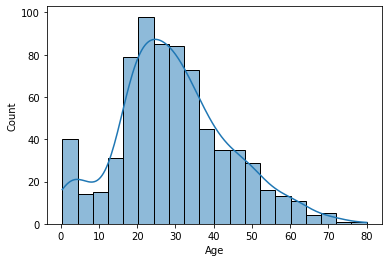

In [7]:
sns.histplot(data = train_df, x = 'Age', kde=True)
plt.show()

- majority passeneger belong to age group between 20 to 40 
- children from 1 to 5 age is 40
- less senior citizen

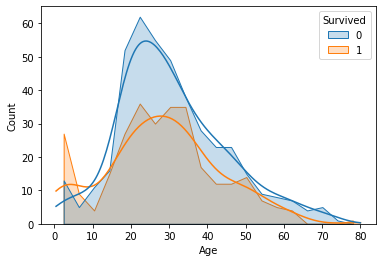

In [8]:
sns.histplot(data = train_df,
             x = 'Age',
             kde=True,
             hue="Survived",
             element="poly")
plt.show()

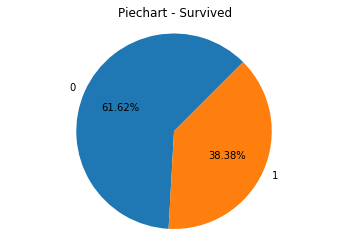

In [9]:
create_piechart(train_df, "Survived")

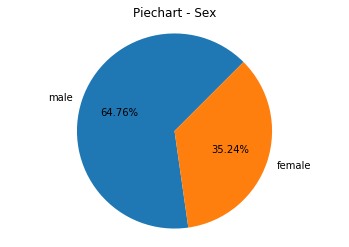

In [10]:
create_piechart(train_df, "Sex")

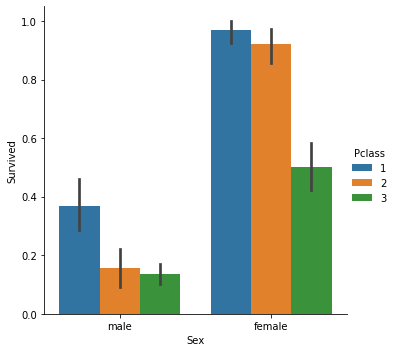

In [11]:
sns.catplot(data= train_df,
           x="Sex",
           y="Survived",
           hue="Pclass",
           kind="bar")
plt.show()

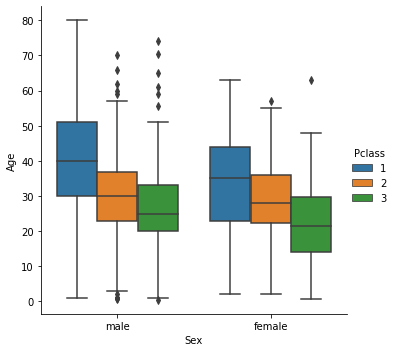

In [12]:
sns.catplot(data= train_df,
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="box")
plt.show()

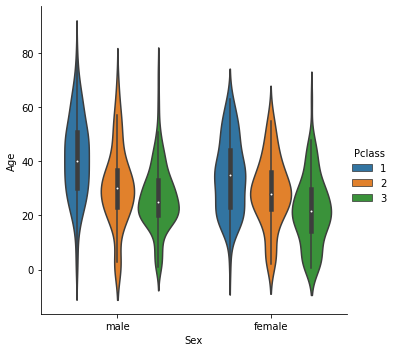

In [13]:
sns.catplot(data= train_df,
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="violin")
plt.show()

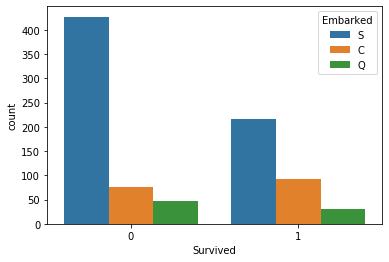

In [14]:
sns.countplot(x="Survived", hue="Embarked", data=train_df)
plt.show()

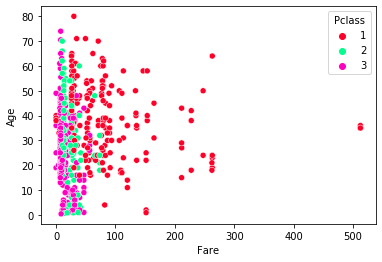

In [15]:
sns.scatterplot(data=train_df, x="Fare", y="Age", hue="Pclass", palette="gist_rainbow")
plt.show()

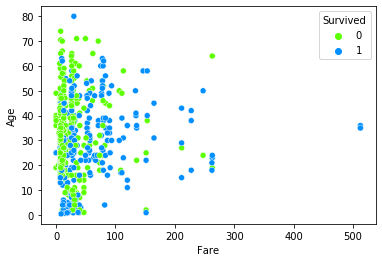

In [16]:
sns.scatterplot(data=train_df, x="Fare", y="Age", hue="Survived", palette="gist_rainbow")
plt.show()

In [17]:
# feature selection 
train_df = train_df[['Name','Pclass','Sex','Age','Survived']]
test_df = test_df[['Name','Pclass','Sex','Age','Survived']]

In [18]:
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         2
Survived    0
dtype: int64


In [19]:
# imputing numerical missing data with mean value
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)

In [20]:
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64


In [21]:
train_df["Sex"]=train_df["Sex"].map({"male":0,"female":1})
test_df["Sex"]=test_df["Sex"].map({"male":0,"female":1})

In [22]:
train_df.head()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",3,0,22.0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1
3,"Heikkinen, Miss. Laina",3,1,26.0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1
5,"Allen, Mr. William Henry",3,0,35.0,0


In [23]:
X_train=train_df.values[:870, 1:-1]
y_train=train_df.values[:870,  -1]
y_train=y_train.astype(int)

X_test=test_df.values[:, 1:-1]
y_test=test_df.values[:, -1]
y_test=y_test.astype(int)

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale= scaler.transform(X_train)
X_test_scale= scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
%%time

#create a model 
classifier=LogisticRegression()

#fiiting training data to the model
classifier.fit(X_train_scale, y_train)

# predict using the model 
y_pred=classifier.predict(X_test_scale)

print(list(zip(y_test, y_pred)))

[(0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0)]
Wall time: 26.1 ms


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", acc)

[[12  2]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of the model:  0.9047619047619048


In [28]:
y_pred_train = classifier.predict(X_train_scale)

cfm=confusion_matrix(y_train,y_pred_train)
print(cfm)

print("Classification report: ")

print(classification_report(y_train,y_pred_train))

acc= accuracy_score(y_train, y_pred_train)
print("Accuracy of the model: ", acc)

[[459  76]
 [100 235]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       535
           1       0.76      0.70      0.73       335

    accuracy                           0.80       870
   macro avg       0.79      0.78      0.78       870
weighted avg       0.80      0.80      0.80       870

Accuracy of the model:  0.7977011494252874


## Using KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train_scale, y_train)

y_pred=model_KNN.predict(X_test_scale)

In [54]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [55]:
y_test

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc_score= accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", acc_score)

[[11  3]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.70      1.00      0.82         7

    accuracy                           0.86        21
   macro avg       0.85      0.89      0.85        21
weighted avg       0.90      0.86      0.86        21

Accuracy of the model:  0.8571428571428571


In [59]:
y_pred_train=model_KNN.predict(X_train_scale)

In [60]:
cfm=confusion_matrix(y_train,y_pred_train)
print(cfm)

print("Classification report: ")

print(classification_report(y_train,y_pred_train))

acc= accuracy_score(y_train, y_pred_train)
print("Accuracy of the model: ", acc)

[[474  61]
 [100 235]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.85       535
           1       0.79      0.70      0.74       335

    accuracy                           0.81       870
   macro avg       0.81      0.79      0.80       870
weighted avg       0.81      0.81      0.81       870

Accuracy of the model:  0.8149425287356322


In [66]:
acc_dict = dict()

for K in range(1, 31):
    # create object with k value
    model_KNN= KNeighborsClassifier(K, metric='euclidean')
    
    # model fit
    model_KNN.fit(X_train_scale, y_train)
    
    # model prediction
    y_pred= model_KNN.predict(X_test_scale)
    
    acc_score=round(accuracy_score(y_test, y_pred),2 )
    
    # print accuracy score
    print("Accuracy is: {} for k-value: {}".format(acc_score,K))
    acc_dict[K] = acc_score

Accuracy is: 0.86 for k-value: 1
Accuracy is: 0.86 for k-value: 2
Accuracy is: 0.86 for k-value: 3
Accuracy is: 0.9 for k-value: 4
Accuracy is: 0.9 for k-value: 5
Accuracy is: 0.9 for k-value: 6
Accuracy is: 0.86 for k-value: 7
Accuracy is: 0.86 for k-value: 8
Accuracy is: 0.81 for k-value: 9
Accuracy is: 0.9 for k-value: 10
Accuracy is: 0.81 for k-value: 11
Accuracy is: 0.9 for k-value: 12
Accuracy is: 0.86 for k-value: 13
Accuracy is: 0.9 for k-value: 14
Accuracy is: 0.86 for k-value: 15
Accuracy is: 0.86 for k-value: 16
Accuracy is: 0.86 for k-value: 17
Accuracy is: 0.86 for k-value: 18
Accuracy is: 0.81 for k-value: 19
Accuracy is: 0.86 for k-value: 20
Accuracy is: 0.81 for k-value: 21
Accuracy is: 0.81 for k-value: 22
Accuracy is: 0.86 for k-value: 23
Accuracy is: 0.81 for k-value: 24
Accuracy is: 0.81 for k-value: 25
Accuracy is: 0.86 for k-value: 26
Accuracy is: 0.86 for k-value: 27
Accuracy is: 0.86 for k-value: 28
Accuracy is: 0.86 for k-value: 29
Accuracy is: 0.86 for k-value

In [67]:
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k,":",acc_dict[k])

4 : 0.9
5 : 0.9
6 : 0.9
10 : 0.9
12 : 0.9
14 : 0.9


In [69]:
model = KNeighborsClassifier(n_neighbors=5, metric="euclidean", n_jobs=-1)

# model fit 
model.fit(X_train_scale, y_train)

# model prediction 
y_pred = model.predict(X_test_scale)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc_score= accuracy_score(y_test, y_pred)
print("Accuracy of the model: ", acc_score)

[[12  2]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of the model:  0.9047619047619048


In [73]:
y_pred_train=model.predict(X_train_scale)

cfm=confusion_matrix(y_train,y_pred_train)
print(cfm)

print("Classification report: ")

print(classification_report(y_train,y_pred_train))

acc= accuracy_score(y_train, y_pred_train)
print("Accuracy of the model: ", acc)

[[486  49]
 [ 84 251]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       535
           1       0.84      0.75      0.79       335

    accuracy                           0.85       870
   macro avg       0.84      0.83      0.84       870
weighted avg       0.85      0.85      0.85       870

Accuracy of the model:  0.8471264367816091
